In [47]:
PATH = "/home/haasehelen/haasehelen/ifwaste/analysis/regression_results/"
DATA_PATH = "/blue/carpena/haasehelen/ifwaste/output/multiple_stores/"

In [48]:
import os
import pandas as pd


CURR_EXP = "run_1/"
#file_names = ['log_bought', 'log_eaten', 'log_wasted', 'log_hh_config', "log_still_have",
          #      "log_hh_daily", "log_sim_config", "log_store_daily", "aggregated_outputs"]
file_names = ["aggregated_outputs"]
data_dict = {}
current_path = os.path.join(DATA_PATH + CURR_EXP)
for file in file_names:
    file_path = os.path.join(current_path + file + ".csv")
    if os.path.exists(file_path):
        print(file_path)
        df = pd.read_csv(file_path)
        df["run"] = 0
        data_dict[file] = df

/blue/carpena/haasehelen/ifwaste/output/multiple_stores/run_1/aggregated_outputs.csv


In [49]:

sample_path = "/blue/carpena/haasehelen/ifwaste/input/gsua_based_configuration/samples/"
df_h = pd.read_csv( sample_path + "household_ifwaste_sample_df.txt", sep="\t") 
df_nh = pd.read_csv( sample_path + "neighborhood_ifwaste_sample_df.txt", sep="\t") 
df_sim = pd.read_csv( sample_path + "household_ifwaste_sample_df.txt", sep="\t")
df_agg_out = data_dict["aggregated_outputs"]

In [50]:
len(df_agg_out)

1152

In [51]:
import ast

from sklearn import preprocessing


def expand_list_column(df, col):
    # Convert string representation of list to actual list
    expanded = df[col].apply(ast.literal_eval)

    # Find max list length
    max_len = expanded.apply(len).max()

    # Create new columns: col_1, col_2, ...
    new_cols = pd.DataFrame(expanded.tolist(), columns=[f"{col}_{i+1}" for i in range(max_len)])
    return new_cols



# Process each column
vector_columns = ["Adult:adult_preference_vector","Child:child_preference_vector"]
flat_cols = [expand_list_column(df_h, col) for col in vector_columns]
print(df_h.columns)
df_h['Household:hh_max_avail_time_per_day'] = df_h['Household:hh_max_avail_time_per_day'].apply(lambda x: sum(ast.literal_eval(x)))
df_h = df_h.drop(columns=vector_columns)

# Concatenate all the expanded columns together
df_flat = pd.concat(flat_cols, axis=1)
df_h = pd.concat([df_flat,df_h], axis=1)
input_columns = df_h.columns


Index(['Household:hh_amount_children', 'Household:hh_amount_adults',
       'Household:hh_level_of_concern', 'Household:hh_impulse_buy_likelihood',
       'Household:hh_daily_budget', 'Household:hh_min_time_to_cook',
       'Household:hh_time_per_store', 'Household:hh_price_sensitivity',
       'Household:hh_brand_sensitivity', 'Household:hh_quality_sensitivity',
       'Household:hh_availability_sensitivity',
       'Household:hh_deal_sensitivity', 'Household:hh_planner',
       'Household:hh_impulsivity', 'Household:hh_brand_preference',
       'Adult:adult_plate_waste', 'Adult:male_store_prepared_ratio',
       'Adult:female_store_prepared_ratio', 'Child:child_plate_waste',
       'Child:male_store_prepared_ratio', 'Child:female_store_prepared_ratio',
       'Cooking:cook_max_scaler_cooking_amount',
       'Cooking:cook_expiration_threshold', 'Household:hh_shopping_frequency',
       'Household:hh_pay_day_interval', 'Household:hh_max_avail_time_per_day',
       'Adult:adult_preferen

In [52]:

df_h.reset_index(inplace=True)
df_h.rename(columns={'index': 'household'}, inplace=True)
df_h["household"] = df_h["household"].astype(int)
df_agg_out["household"] = df_agg_out["household"].astype(int)
output_columns = df_agg_out.columns
output_columns = list(set(output_columns)- set([ "household", 'n_quickcook', 'n_cook', 'n_attempted_cook', 'n_leftovers', 'n_shop', 'n_quickshop', 'n_attempted_shop', 'run']))
output_columns

['Spoiled Food',
 'FGSNACKS',
 'FGMEAT',
 'Plate Waste',
 'FGSTOREPREPARED',
 'FGBAKED',
 'Prepared',
 'Preprepared',
 'FGVEGETABLE',
 'FGDRYFOOD',
 'FGDAIRY',
 'Unprepared',
 'Inedible Parts']

In [53]:
df_h.head()

,household,Adult:adult_preference_vector_1,Adult:adult_preference_vector_2,Adult:adult_preference_vector_3,Adult:adult_preference_vector_4,Adult:adult_preference_vector_5,Adult:adult_preference_vector_6,Adult:adult_preference_vector_7,Child:child_preference_vector_1,Child:child_preference_vector_2,...,Adult:male_store_prepared_ratio,Adult:female_store_prepared_ratio,Child:child_plate_waste,Child:male_store_prepared_ratio,Child:female_store_prepared_ratio,Cooking:cook_max_scaler_cooking_amount,Cooking:cook_expiration_threshold,Household:hh_shopping_frequency,Household:hh_pay_day_interval,Household:hh_max_avail_time_per_day
0,0,1.0,0.06,0.6,0.83,0.13,0.81,0.95,0.76,0.38,...,0.04,0.12,0.324,0.22,0.37,2.73,2.94,9,30,749
1,1,1.0,0.06,0.6,0.83,0.13,0.81,0.95,0.76,0.38,...,0.04,0.12,0.324,0.22,0.37,2.73,2.94,9,30,749
2,2,1.0,0.06,0.6,0.83,0.13,0.81,0.95,0.76,0.38,...,0.04,0.12,0.324,0.22,0.37,2.73,2.94,9,30,749
3,3,1.0,0.06,0.6,0.83,0.13,0.81,0.95,0.76,0.38,...,0.04,0.12,0.324,0.22,0.37,2.73,2.94,9,30,749
4,4,1.0,0.06,0.6,0.83,0.13,0.81,0.95,0.76,0.38,...,0.04,0.12,0.324,0.22,0.37,2.73,2.94,9,30,749


In [54]:
df_agg_out

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,...,Unprepared,Preprepared,n_quickcook,n_cook,n_attempted_cook,n_leftovers,n_shop,n_quickshop,n_attempted_shop,run
0,129,241.701,187.379,212.374,88.956,183.519,171.395,175.391,318.817,819.560,...,381.384,175.391488,9.0,87.0,4.0,99.0,25.0,22.0,12.0,0
1,1101,125.078,227.845,139.137,145.081,190.840,80.289,294.635,168.600,1002.317,...,172.147,294.634621,0.0,87.0,13.0,87.0,0.0,87.0,25.0,0
2,1050,1015.329,412.261,773.011,412.310,378.752,869.936,830.184,684.874,1918.591,...,2130.591,830.184291,6.0,93.0,1.0,99.0,10.0,43.0,5.0,0
3,432,149.051,258.827,170.147,183.855,213.483,198.593,430.778,210.376,365.578,...,331.606,430.777779,4.0,92.0,4.0,100.0,8.0,42.0,9.0,0
4,888,160.271,226.466,146.451,124.561,241.530,97.037,211.593,252.827,858.362,...,279.332,211.592573,11.0,85.0,4.0,100.0,23.0,26.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,981,539.304,491.257,442.143,287.356,318.465,292.065,1936.373,604.486,1798.733,...,848.645,1936.372587,4.0,87.0,9.0,97.0,7.0,60.0,11.0,0
1148,1038,385.848,464.368,384.490,287.498,395.765,253.112,867.494,504.255,1838.543,...,622.311,867.494306,1.0,94.0,5.0,95.0,3.0,77.0,13.0,0
1149,265,1140.412,421.432,962.385,395.369,398.332,937.980,937.502,747.763,1923.188,...,2499.443,937.501800,0.0,98.0,2.0,100.0,12.0,35.0,3.0,0
1150,493,216.086,202.495,158.137,134.135,173.374,145.638,243.485,287.960,861.995,...,317.380,243.484572,10.0,90.0,0.0,100.0,27.0,22.0,6.0,0


In [55]:
len(df_agg_out)

1152

In [56]:
combined_df = pd.merge(df_agg_out, df_h, on='household', how='inner')  # 'inner' is default
print(len(combined_df))

1152


In [57]:
combined_df[combined_df["household"]==61]

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,...,Adult:male_store_prepared_ratio,Adult:female_store_prepared_ratio,Child:child_plate_waste,Child:male_store_prepared_ratio,Child:female_store_prepared_ratio,Cooking:cook_max_scaler_cooking_amount,Cooking:cook_expiration_threshold,Household:hh_shopping_frequency,Household:hh_pay_day_interval,Household:hh_max_avail_time_per_day
341,61,254.286,91.678,202.958,174.558,145.992,215.351,364.347,212.332,324.983,...,0.04,0.12,0.324,0.22,0.37,2.73,2.94,9,30,701


In [58]:
combined_df #TODO why not 1152?

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,...,Adult:male_store_prepared_ratio,Adult:female_store_prepared_ratio,Child:child_plate_waste,Child:male_store_prepared_ratio,Child:female_store_prepared_ratio,Cooking:cook_max_scaler_cooking_amount,Cooking:cook_expiration_threshold,Household:hh_shopping_frequency,Household:hh_pay_day_interval,Household:hh_max_avail_time_per_day
0,129,241.701,187.379,212.374,88.956,183.519,171.395,175.391,318.817,819.560,...,0.24,0.26,0.176,0.03,0.01,1.97,3.39,3,14,912
1,1101,125.078,227.845,139.137,145.081,190.840,80.289,294.635,168.600,1002.317,...,0.14,0.35,0.428,0.18,0.10,1.32,5.04,7,14,529
2,1050,1015.329,412.261,773.011,412.310,378.752,869.936,830.184,684.874,1918.591,...,0.33,0.00,0.266,0.37,0.26,1.09,2.17,8,7,847
3,432,149.051,258.827,170.147,183.855,213.483,198.593,430.778,210.376,365.578,...,0.04,0.12,0.324,0.22,0.37,2.73,2.94,9,30,744
4,888,160.271,226.466,146.451,124.561,241.530,97.037,211.593,252.827,858.362,...,0.24,0.26,0.176,0.03,0.01,1.97,3.39,3,14,912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,981,539.304,491.257,442.143,287.356,318.465,292.065,1936.373,604.486,1798.733,...,0.33,0.00,0.266,0.37,0.26,1.09,2.17,8,7,847
1148,1038,385.848,464.368,384.490,287.498,395.765,253.112,867.494,504.255,1838.543,...,0.33,0.00,0.266,0.37,0.26,1.09,2.17,8,7,847
1149,265,1140.412,421.432,962.385,395.369,398.332,937.980,937.502,747.763,1923.188,...,0.33,0.00,0.266,0.37,0.26,1.09,2.17,8,7,847
1150,493,216.086,202.495,158.137,134.135,173.374,145.638,243.485,287.960,861.995,...,0.24,0.26,0.176,0.03,0.01,1.97,3.39,3,14,912


In [59]:
combined_nonhousehold = combined_df.drop(columns=["household"])
scaler = preprocessing.StandardScaler()
combined_df = pd.DataFrame(scaler.fit_transform(combined_nonhousehold), 
                        columns=combined_nonhousehold.columns, 
                        index=combined_nonhousehold.index)
print(combined_df.mean())
print(combined_df.std(ddof=0))  

FGMEAT                                    4.625929e-17
FGDAIRY                                   3.114792e-16
FGVEGETABLE                              -7.709882e-17
FGDRYFOOD                                 3.083953e-17
FGSNACKS                                 -6.167906e-17
                                              ...     
Cooking:cook_max_scaler_cooking_amount    4.009139e-16
Cooking:cook_expiration_threshold        -4.101657e-16
Household:hh_shopping_frequency          -1.356939e-16
Household:hh_pay_day_interval             1.457168e-16
Household:hh_max_avail_time_per_day       2.760138e-16
Length: 61, dtype: float64
FGMEAT                                    1.0
FGDAIRY                                   1.0
FGVEGETABLE                               1.0
FGDRYFOOD                                 1.0
FGSNACKS                                  1.0
                                         ... 
Cooking:cook_max_scaler_cooking_amount    1.0
Cooking:cook_expiration_threshold         1.0


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# ====== SETUP ======
os.makedirs(PATH, exist_ok=True)

results_list = []  # To store results for all regressions
metrics_list = []
# ====== LOOP OVER EACH FW OUTCOME ======
for target in output_columns:
    # 1. Data
    X = combined_df[input_columns]
    y = combined_df[target]

    # 4. Fit statsmodels OLS for p-values and beta coefficients
    X_scaled_const = sm.add_constant(X)
    ols_model = sm.OLS(y, X_scaled_const).fit()

    # 5. Get metrics
    r2 = ols_model.rsquared
    coef = ols_model.params.round(3)
    pvals = ols_model.pvalues.round(3)
    std_errs = ols_model.bse.round(3)

    # 6. Save summary table
    summary_df = pd.DataFrame({
        'Predictor': coef.index,
        'Coef': coef.values,
        'Std Err': std_errs.values,
        'p-value': pvals.values,
    })

    summary_df['Significant'] = summary_df['p-value'] < 0.05
    summary_df.to_csv(f"{PATH}{target}_regression_summary.csv", index=False)

    # Save summary table to results list
    summary_df['FW Category'] = target
    results_list.append(summary_df)

    # 7. Sklearn model for prediction evaluation
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2_test = r2_score(y, y_pred)

    # Inside the regression loop, after computing metrics:
    metrics_list.append({
        'FW Category': target,
        'R2_Train_OLS': round(r2, 3),
        'MAE': round(mae, 3),
        'MSE': round(mse, 3),
        'RMSE': round(rmse, 3)
    })
    
    # 8. Plot: Predictions vs Actual
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y, y=y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted for {target}")
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f"{PATH}{target}_actual_vs_pred.png")
    plt.close()

    # 9. Plot: Residuals
    residuals = y - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"Residuals for {target}")
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f"{PATH}{target}_residuals.png")
    plt.close()

# ====== Combine All Summaries ======
all_results_df = pd.concat(results_list)
all_results_df.to_csv(f"{PATH}all_regression_results.csv", index=False)


all_results_df = all_results_df[all_results_df["Significant"] == True]
all_results_df.to_csv(f"{PATH}regression_significant_coefficients.csv", index=False)

metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv(f"{PATH}all_regression_metrics.csv", index=False)

In [61]:
metrics_df

,FW Category,R2_Train_OLS,MAE,MSE,RMSE
0,Spoiled Food,0.731,0.341,0.269,0.519
1,FGSNACKS,0.827,0.295,0.173,0.416
2,FGMEAT,0.735,0.349,0.265,0.515
3,Plate Waste,0.971,0.110,0.029,0.171
4,FGSTOREPREPARED,0.759,0.321,0.241,0.490
5,FGBAKED,0.647,0.416,0.353,0.594
6,Prepared,0.880,0.253,0.120,0.346
7,Preprepared,0.759,0.321,0.241,0.490
8,FGVEGETABLE,0.674,0.414,0.326,0.571
9,FGDRYFOOD,0.754,0.375,0.246,0.496


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Feature matrix
X = combined_df[input_columns]
metrics_list = []
# === Loop over each output variable ===
for output in output_columns:
    print(f"\n{'='*40}\nOutput Variable: {output}\n{'='*40}")

    # 2. Target vector
    y = combined_df[output]

    # 3. Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")

    # 4. Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Model training complete.")

    # 5. Predict
    y_pred = model.predict(X_test)

    # 6. Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    # Inside the regression loop, after computing metrics:
    metrics_list.append({
        'FW Category': target,
        'R2_Train_OLS': round(r2, 3),
        'R2_Test': round(r2_test, 3),
        'MAE': round(mae, 3),
        'MSE': round(mse, 3),
        'RMSE': round(rmse, 3)
    })


    # 7. Coefficients
    coef_dict = dict(zip(X.columns, model.coef_))
    sorted_coefs = sorted(coef_dict.items(), key=lambda x: x[1])

    print("\nTop Drivers:")
    print(f"  🔻 Strongest Negative: {sorted_coefs[0][0]} ({sorted_coefs[0][1]:.3f})")
    print(f"  ✅ Strongest Positive: {sorted_coefs[-1][0]} ({sorted_coefs[-1][1]:.3f})")

    print("\nTop 3 Positive Drivers:")
    for feature, coef in sorted(coef_dict.items(), key=lambda x: -x[1])[:3]:
        print(f"  {feature}: {coef:.3f}")

    print("Top 3 Negative Drivers:")
    for feature, coef in sorted(coef_dict.items(), key=lambda x: x[1])[:3]:
        print(f"  {feature}: {coef:.3f}")

    # 8. Plot Actual vs Predicted
    #plt.figure(figsize=(8, 5))
    #sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    #plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    #plt.xlabel("Actual")
    #plt.ylabel("Predicted")
    #plt.title(f"Actual vs Predicted: {output}")
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()

    # 9. Residuals Plot
    #residuals = y_test - y_pred
    #plt.figure(figsize=(8, 5))
    #sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    #plt.axhline(0, color='red', linestyle='--')
    #plt.xlabel("Predicted")
    #plt.ylabel("Residuals")
    #plt.title(f"Residuals vs Predicted: {output}")
    #plt.grid(True)
    #plt.tight_layout()
    #plt.show()
#metrics_df = pd.DataFrame(metrics_list)
#metrics_df.to_csv(PATH + "all_regression_metrics.csv", index=False)



Output Variable: Spoiled Food
Training set size: 921 samples
Testing set size: 231 samples
Model training complete.

Top Drivers:
  🔻 Strongest Negative: Household:hh_level_of_concern (-0.617)
  ✅ Strongest Positive: Household:hh_amount_children (0.404)

Top 3 Positive Drivers:
  Household:hh_amount_children: 0.404
  Household:hh_shopping_frequency: 0.340
  Household:hh_deal_sensitivity: 0.254
Top 3 Negative Drivers:
  Household:hh_level_of_concern: -0.617
  Child:child_preference_vector_4: -0.292
  Adult:female_store_prepared_ratio: -0.191

Output Variable: FGSNACKS
Training set size: 921 samples
Testing set size: 231 samples
Model training complete.

Top Drivers:
  🔻 Strongest Negative: Household:hh_level_of_concern (-0.439)
  ✅ Strongest Positive: Household:hh_amount_children (1.394)

Top 3 Positive Drivers:
  Household:hh_amount_children: 1.394
  Child:child_plate_waste: 0.467
  Adult:adult_preference_vector_4: 0.428
Top 3 Negative Drivers:
  Household:hh_level_of_concern: -0.439


In [63]:
output_columns

['Spoiled Food',
 'FGSNACKS',
 'FGMEAT',
 'Plate Waste',
 'FGSTOREPREPARED',
 'FGBAKED',
 'Prepared',
 'Preprepared',
 'FGVEGETABLE',
 'FGDRYFOOD',
 'FGDAIRY',
 'Unprepared',
 'Inedible Parts']

Training set size: 921 samples
Testing set size: 231 samples

Model Training Complete.

Model Evaluation for Each Output Variable:

Spoiled Food:
  MAE: 0.369
  MSE: 0.340
  RMSE: 0.583
  R2: 0.642

FGSNACKS:
  MAE: 0.304
  MSE: 0.166
  RMSE: 0.408
  R2: 0.807

FGMEAT:
  MAE: 0.350
  MSE: 0.265
  RMSE: 0.514
  R2: 0.710

Plate Waste:
  MAE: 0.122
  MSE: 0.037
  RMSE: 0.193
  R2: 0.963

FGSTOREPREPARED:
  MAE: 0.337
  MSE: 0.265
  RMSE: 0.515
  R2: 0.721

FGBAKED:
  MAE: 0.415
  MSE: 0.359
  RMSE: 0.599
  R2: 0.587

Prepared:
  MAE: 0.271
  MSE: 0.121
  RMSE: 0.348
  R2: 0.860

Preprepared:
  MAE: 0.337
  MSE: 0.265
  RMSE: 0.515
  R2: 0.721

FGVEGETABLE:
  MAE: 0.412
  MSE: 0.344
  RMSE: 0.587
  R2: 0.624

FGDRYFOOD:
  MAE: 0.392
  MSE: 0.246
  RMSE: 0.496
  R2: 0.745

FGDAIRY:
  MAE: 0.330
  MSE: 0.177
  RMSE: 0.421
  R2: 0.790

Unprepared:
  MAE: 0.332
  MSE: 0.295
  RMSE: 0.543
  R2: 0.679

Inedible Parts:
  MAE: 0.308
  MSE: 0.171
  RMSE: 0.413
  R2: 0.814

Regression Coefficients 

/scratch/local/7123183/ipykernel_2182337/2144184241.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_impact.values, y=overall_impact.index, palette="viridis")


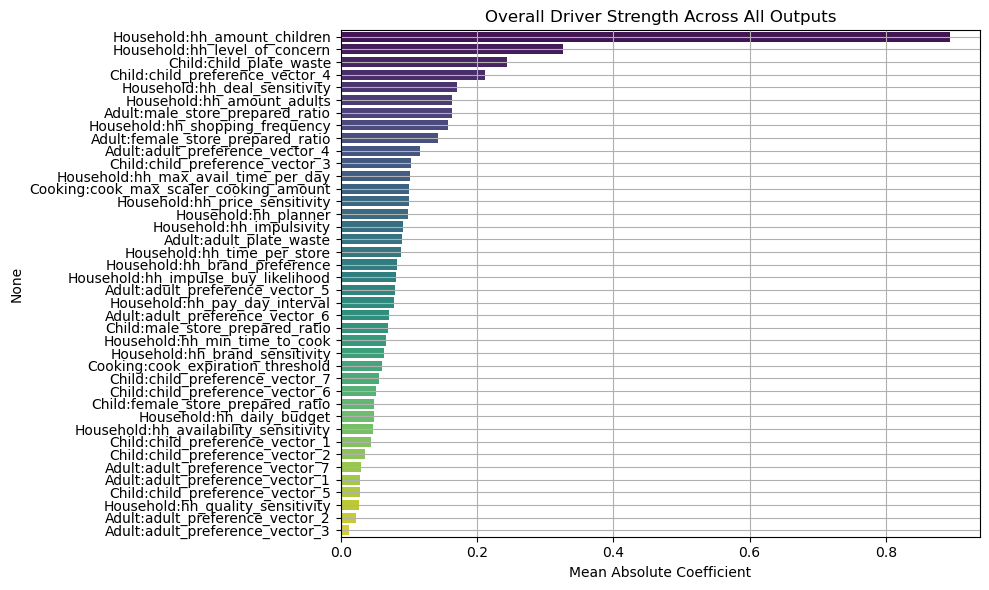


Summary of Key Drivers for Each Output:
                    Strongest Positive Driver  Max Coefficient  \
Spoiled Food     Household:hh_amount_children            0.404   
FGSNACKS         Household:hh_amount_children            1.394   
FGMEAT           Household:hh_amount_children            0.652   
Plate Waste      Household:hh_amount_children            1.303   
FGSTOREPREPARED  Household:hh_amount_children            0.620   
FGBAKED          Household:hh_amount_children            0.753   
Prepared         Household:hh_amount_children            1.460   
Preprepared      Household:hh_amount_children            0.620   
FGVEGETABLE      Household:hh_amount_children            0.730   
FGDRYFOOD        Household:hh_amount_children            1.092   
FGDAIRY          Household:hh_amount_children            1.183   
Unprepared       Household:hh_amount_children            0.510   
Inedible Parts   Household:hh_amount_children            0.898   

                         Strongest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === DATA PREP ===
X = combined_df[input_columns]
y = combined_df[output_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# === MODEL TRAINING ===
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel Training Complete.")

# === PREDICTIONS ===
y_pred = model.predict(X_test)

# === EVALUATION ===
print("\nModel Evaluation for Each Output Variable:")
for i, output_name in enumerate(output_columns):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"\n{output_name}:")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R2: {r2:.3f}")

# === COEFFICIENT ANALYSIS ===
coef_df = pd.DataFrame(model.coef_, columns=input_columns, index=output_columns)
print("\nRegression Coefficients (Impact of Each Input on Each Output):")
print(coef_df.round(3))

# === TOP DRIVERS PER OUTPUT ===
print("\nTop Positive and Negative Drivers per Output:")
for output in coef_df.index:
    sorted_coefs = coef_df.loc[output].sort_values(ascending=False)
    print(f"\n{output}:")
    print(f"  ✅ Strongest positive driver: {sorted_coefs.index[0]} ({sorted_coefs.iloc[0]:.3f})")
    print(f"  🔻 Strongest negative driver: {sorted_coefs.index[-1]} ({sorted_coefs.iloc[-1]:.3f})")

# === OVERALL DRIVER IMPACT ===
overall_impact = coef_df.abs().mean().sort_values(ascending=False)
print("\nOverall Feature Impact on Food Waste (mean absolute coefficient across all outputs):")
for feature, impact in overall_impact.items():
    print(f"{feature}: {impact:.3f}")

# === PLOT OVERALL DRIVER IMPACT ===
plt.figure(figsize=(10, 6))
sns.barplot(x=overall_impact.values, y=overall_impact.index, palette="viridis")
plt.xlabel("Mean Absolute Coefficient")
plt.title("Overall Driver Strength Across All Outputs")
plt.grid(True)
plt.tight_layout()
plt.show()

# === SUMMARY TABLE ===
summary = pd.DataFrame({
    'Strongest Positive Driver': coef_df.idxmax(axis=1),
    'Max Coefficient': coef_df.max(axis=1).round(3),
    'Strongest Negative Driver': coef_df.idxmin(axis=1),
    'Min Coefficient': coef_df.min(axis=1).round(3)
})


In [65]:
metrics_df

,FW Category,R2_Train_OLS,MAE,MSE,RMSE
0,Spoiled Food,0.731,0.341,0.269,0.519
1,FGSNACKS,0.827,0.295,0.173,0.416
2,FGMEAT,0.735,0.349,0.265,0.515
3,Plate Waste,0.971,0.110,0.029,0.171
4,FGSTOREPREPARED,0.759,0.321,0.241,0.490
5,FGBAKED,0.647,0.416,0.353,0.594
6,Prepared,0.880,0.253,0.120,0.346
7,Preprepared,0.759,0.321,0.241,0.490
8,FGVEGETABLE,0.674,0.414,0.326,0.571
9,FGDRYFOOD,0.754,0.375,0.246,0.496


In [70]:
# Long format again
coef_long = coef_df.reset_index().melt(id_vars='index', 
                                       var_name='Input Feature', 
                                       value_name='Coefficient')
coef_long.rename(columns={'index': 'Output Variable'}, inplace=True)

# Sum absolute coefficients per input feature
driver_scores = coef_long.groupby('Input Feature')['Coefficient'].agg(['sum', 'mean', 'std', lambda x: x.abs().sum()])
driver_scores.columns = ['Sum', 'Mean', 'Std', 'Total_Abs_Impact']
driver_scores = driver_scores.sort_values(by='Total_Abs_Impact', ascending=False)

# Top 5 most impactful
top5_positive = driver_scores.sort_values(by='Sum', ascending=False).head(5)
top5_negative = driver_scores.sort_values(by='Sum', ascending=True).head(5)

print("🔝 Top 5 Overall Positive Drivers (based on total sum):")
print(top5_positive[['Sum', 'Mean', 'Total_Abs_Impact']])

print("\n🔻 Top 5 Overall Negative Drivers (based on total sum):")
print(top5_negative[['Sum', 'Mean', 'Total_Abs_Impact']])


🔝 Top 5 Overall Positive Drivers (based on total sum):
                                       Sum      Mean  Total_Abs_Impact
Input Feature                                                         
Household:hh_amount_children     11.616493  0.893576         11.616493
Child:child_plate_waste           3.159417  0.243032          3.177998
Household:hh_amount_adults        2.125408  0.163493          2.125408
Adult:male_store_prepared_ratio   2.073984  0.159537          2.122123
Household:hh_shopping_frequency   2.014815  0.154986          2.043417

🔻 Top 5 Overall Negative Drivers (based on total sum):
                                        Sum      Mean  Total_Abs_Impact
Input Feature                                                          
Household:hh_level_of_concern     -4.203225 -0.323325          4.237944
Child:child_preference_vector_4   -2.760358 -0.212335          2.760358
Adult:female_store_prepared_ratio -1.775955 -0.136612          1.849102
Child:child_preference_vector_3 

/scratch/local/7123183/ipykernel_2182337/2646577903.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_pos = coef_long.groupby("Output Variable").apply(lambda x: x.nlargest(top_n, "Coefficient")).reset_index(drop=True)
/scratch/local/7123183/ipykernel_2182337/2646577903.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_neg = coef_long.groupby("Output Variable").apply(lambda x: x.nsmallest(top_n

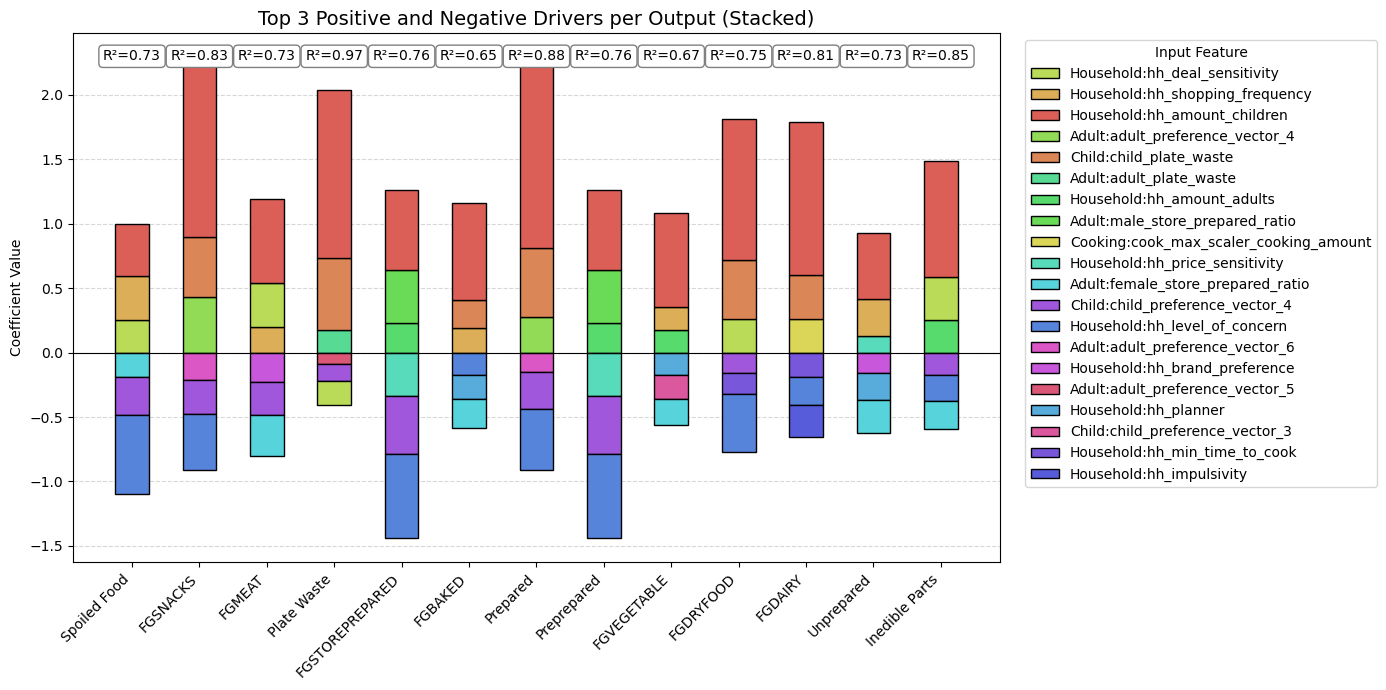

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 3

# Melt coefficients into long format
coef_long = coef_df.reset_index().melt(id_vars='index', var_name='Input Feature', value_name='Coefficient')
coef_long.rename(columns={'index': 'Output Variable'}, inplace=True)

# Get top N positive and negative coefficients
top_pos = coef_long.groupby("Output Variable").apply(lambda x: x.nlargest(top_n, "Coefficient")).reset_index(drop=True)
top_neg = coef_long.groupby("Output Variable").apply(lambda x: x.nsmallest(top_n, "Coefficient")).reset_index(drop=True)

# Add direction labels
top_pos["Driver Type"] = "Positive"
top_neg["Driver Type"] = "Negative"
top_combined = pd.concat([top_pos, top_neg])

# Plot setup
outputs = coef_df.index.tolist()
x = np.arange(len(outputs))
bar_width = 0.5

# Color palette
colors = sns.color_palette("hls", n_colors=top_combined["Input Feature"].nunique())
feature_colors = {feature: colors[i] for i, feature in enumerate(top_combined["Input Feature"].unique())}

fig, ax = plt.subplots(figsize=(14, 7))

# Plot positive stacked bars
for i, output in enumerate(outputs):
    y_offset = 0
    pos_drivers = top_pos[top_pos["Output Variable"] == output].sort_values(by="Coefficient")
    for _, row in pos_drivers.iterrows():
        ax.bar(x[i], row["Coefficient"], bar_width,
               bottom=y_offset, color=feature_colors[row["Input Feature"]],
               edgecolor='black', label=row["Input Feature"])
        #ax.text(x[i], y_offset + row["Coefficient"]/2,
        #        f"{row['Coefficient']:.2f}", ha='center', va='center', fontsize=9, color='black',
        #        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')) # Added bbox for readability
        
        y_offset += row["Coefficient"]

# Plot negative stacked bars
for i, output in enumerate(outputs):
    y_offset = 0
    neg_drivers = top_neg[top_neg["Output Variable"] == output].sort_values(by="Coefficient", ascending=False)
    for _, row in neg_drivers.iterrows():
        ax.bar(x[i], row["Coefficient"], bar_width,
               bottom=y_offset, color=feature_colors[row["Input Feature"]],
               edgecolor='black', label=row["Input Feature"])
        #ax.text(x[i], y_offset + row["Coefficient"]/2,
        #        f"{row['Coefficient']:.2f}", ha='center', va='center', fontsize=9, color='black',
        #        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2')) # Added bbox for readability
        
        y_offset += row["Coefficient"]

# Final touches
# Add R² annotation from metrics_df
for i, output in enumerate(outputs):
    r2_value = metrics_df.loc[metrics_df["FW Category"] == output, "R2_Train_OLS"].values
    if len(r2_value) > 0:
        ax.text(x[i], ax.get_ylim()[1] * 0.95,  # Position near top of plot
                f"R²={r2_value[0]:.2f}", ha='center', va='top', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))

ax.set_xticks(x)
ax.set_xticklabels(outputs, rotation=45, ha='right')
ax.axhline(0, color='black', linewidth=0.8)
ax.set_ylabel("Coefficient Value")
ax.set_title(f"Top {top_n} Positive and Negative Drivers per Output (Stacked)", fontsize=14)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Handle legend (only show each feature once)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Input Feature", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


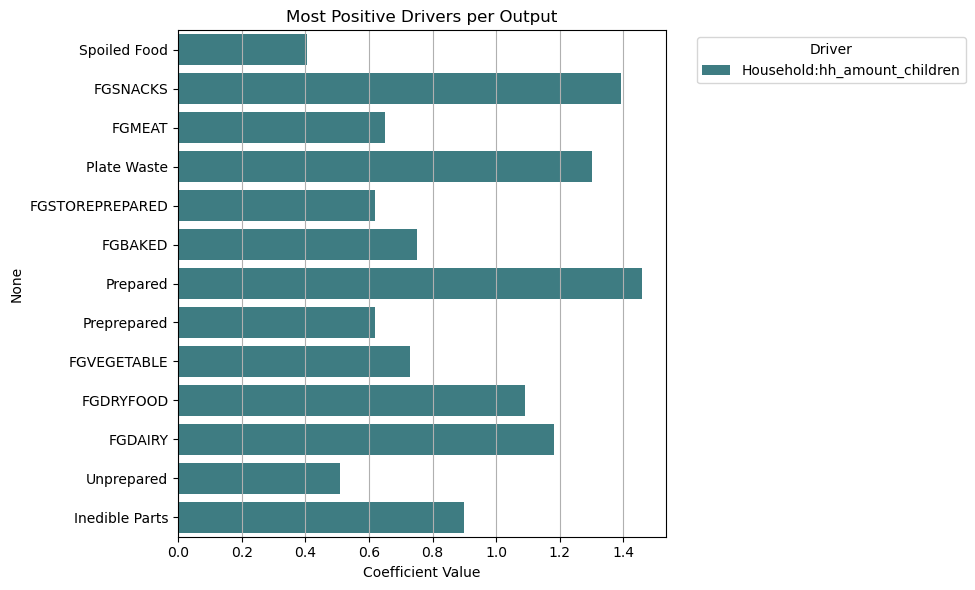

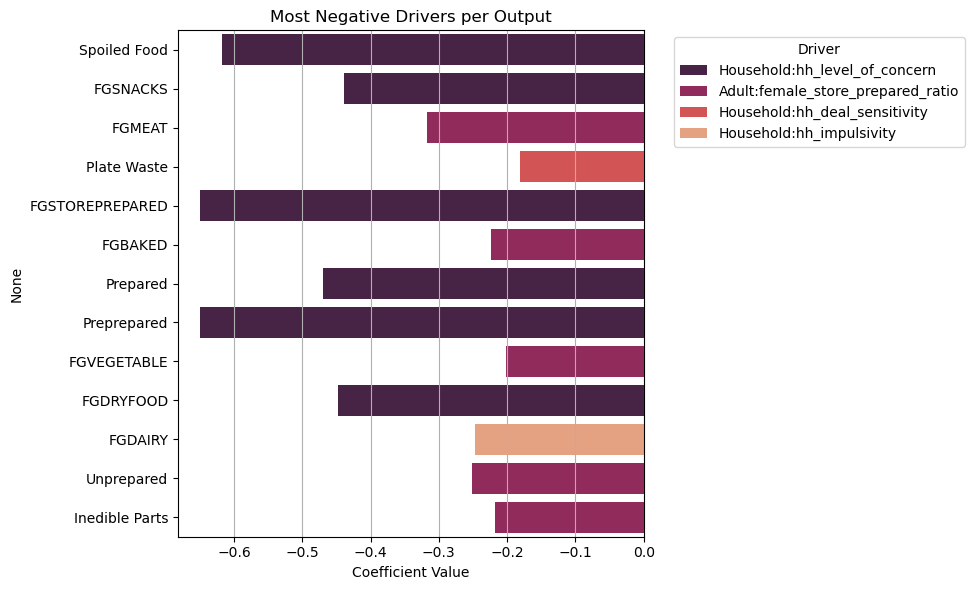

In [67]:
# === PLOT MOST POSITIVE DRIVERS PER OUTPUT ===
most_positive_drivers = coef_df.idxmax(axis=1)
positive_values = coef_df.max(axis=1)

plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=positive_values.values, y=most_positive_drivers.index, hue=most_positive_drivers.values, dodge=False, palette="crest")
plt.xlabel("Coefficient Value")
plt.title("Most Positive Drivers per Output")
plt.legend(title="Driver", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

# === PLOT MOST NEGATIVE DRIVERS PER OUTPUT ===
most_negative_drivers = coef_df.idxmin(axis=1)
negative_values = coef_df.min(axis=1)

plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=negative_values.values, y=most_negative_drivers.index, hue=most_negative_drivers.values, dodge=False, palette="rocket")
plt.xlabel("Coefficient Value")
plt.title("Most Negative Drivers per Output")
plt.legend(title="Driver", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [68]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# 1) Clean columns (adjust for your dataset)
combined_df.columns = combined_df.columns.str.replace(':', '_').str.replace(' ', '_')

# 2) Update input/output columns accordingly
input_columns = [col.replace(':', '_').replace(' ', '_') for col in input_columns]
output_columns = [col.replace(':', '_').replace(' ', '_') for col in output_columns]

# 3) Build formula
formula = ' + '.join(output_columns) + ' ~ ' + ' + '.join(input_columns)

# 4) Fit MANOVA
manova = MANOVA.from_formula(formula, data=combined_df)
mv_test_result = manova.mv_test()

# Extract each section (each predictor)
result_tables = {}

for effect in mv_test_result.results:
    table = mv_test_result.results[effect]['stat']
    df = table.reset_index().rename(columns={"index": "Test Statistic"})
    df.insert(0, "Predictor", effect)
    result_tables[effect] = df

# Combine into one DataFrame
all_results_df = pd.concat(result_tables.values(), ignore_index=True)

# Export to CSV
all_results_df = all_results_df.apply(pd.to_numeric, errors='ignore')

# Then round
all_results_df = all_results_df.round(3)
all_results_df.to_csv(PATH+ "manova_results.csv", index=False)

# Export to LaTeX
#with open("manova_results.tex", "w") as f:
#   f.write(all_results_df.to_latex(index=False, float_format="%.4f", caption="MANOVA Results", label="tab:manova"))


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
all_results_df.head()

,Predictor,Test Statistic,Value,Num DF,Den DF,F Value,Pr > F
0,Intercept,Wilks' lambda,0.945,13,1098.0,4.884000e+00,0.0
1,Intercept,Pillai's trace,0.055,13,1098.0,4.884000e+00,0.0
2,Intercept,Hotelling-Lawley trace,0.058,13,1098.0,4.884000e+00,0.0
3,Intercept,Roy's greatest root,0.058,13,1098.0,4.884000e+00,0.0
4,household,Wilks' lambda,-0.000,14,1097.0,-8.822230e+16,1.0


In [ ]:
#reduce set for table to p value < 0.005 and only wilks
all_results_df = all_results_df[all_results_df["Pr > F"]  < 0.005]
all_results_df = all_results_df[all_results_df["Test Statistic"]  == "Wilks' lambda"]
all_results_df = all_results_df.drop(columns=["Test Statistic"])
all_results_df.to_csv(PATH + "manova_results_reduced.csv", index=False)